## Head_pose_estimation 

##installing Mediapipe

In [1]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.3 MB/s 


##import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import mediapipe as mp
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow
import glob

## load data

In [3]:
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
To: /content/AFLW2000-3D.zip
100% 87.4M/87.4M [00:03<00:00, 22.1MB/s]
Archive:  /content/AFLW2000-3D.zip
   creating: AFLW2000/
   creating: AFLW2000/Code/
  inflating: AFLW2000/Code/DrawSolidHead.m  
  inflating: AFLW2000/Code/DrawTextureHead.m  
  inflating: AFLW2000/Code/main_show_without_BFM.m  
  inflating: AFLW2000/Code/main_show_with_BFM.m  
   creating: AFLW2000/Code/Mex/
  inflating: AFLW2000/Code/Mex/compile.m  
  inflating: AFLW2000/Code/Mex/Tnorm_Vnorm.h  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.cpp  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.mexw64  
   creating: AFLW2000/Code/ModelGeneration/
  inflating: AFLW2000/Code/ModelGeneration/ModelGenerate.m  
  inflati

In [7]:
images_list = [Path(f).stem for f in glob.glob("/content/AFLW2000/*.mat")]
def get_list_from_filenames(file_path):
    lines = [Path(f).stem for f in glob.glob(file_path)]
    return lines

In [8]:
print("length of images names :",len(images_list))

length of images names : 2000


In [9]:
import scipy.io
mat = scipy.io.loadmat('/content/AFLW2000/image00320.mat')

## Extract feature 

In [10]:
df = pd.DataFrame(columns = ['ImgName','yaw', 'pitch', 'roll'])
df['ImgName'] = images_list

In [11]:
LandMarks_df = pd.DataFrame()

In [13]:
random_file = 'image04355'
features = []
for img in images_list:
    
    faceModule = mp.solutions.face_mesh
    # loading image with correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # loading the image
        image = cv2.imread('/content/AFLW2000/'+img+'.jpg')
        mat = scipy.io.loadmat('/content/AFLW2000/'+img+'.mat')
        YawPitchRoll = mat['Pose_Para'][0][:3] 
        pitch = YawPitchRoll[0]
        yaw = YawPitchRoll[1]
        roll = YawPitchRoll[2]
        df.loc[df.ImgName==img,'yaw'] = yaw
        df.loc[df.ImgName==img,'pitch'] = pitch
        df.loc[df.ImgName==img,'roll'] = roll

        # extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        MyList1 = []
        if results.multi_face_landmarks != None: 
        # looping over the faces for each  image
            for face in results.multi_face_landmarks:
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
  
                    shape = image.shape 
                    features_x = int(x * shape[1])
                    features_y = int(y * shape[0])
                    MyList1.extend([features_x,features_y])
                    cv2.putText(image, str(features_y), (int(features_x),int(features_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0), 2)
                    cv2.circle(image, (features_x, features_y), radius=1, color=(0, 255, 0), thickness=2)
        features.append(np.array(MyList1,dtype=np.float32))

In [21]:
features_ = pd.DataFrame(features)
features_

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,235.0,300.0,250.0,279.0,239.0,283.0,242.0,252.0,252.0,272.0,...,248.0,226.0,246.0,229.0,247.0,231.0,275.0,222.0,278.0,219.0
2,251.0,304.0,231.0,288.0,239.0,291.0,206.0,266.0,225.0,280.0,...,221.0,222.0,218.0,227.0,216.0,231.0,256.0,189.0,258.0,184.0
3,236.0,327.0,201.0,306.0,220.0,308.0,180.0,278.0,193.0,298.0,...,205.0,220.0,202.0,227.0,198.0,232.0,242.0,178.0,245.0,169.0
4,203.0,305.0,184.0,277.0,200.0,284.0,185.0,250.0,182.0,269.0,...,225.0,217.0,220.0,221.0,215.0,224.0,262.0,206.0,267.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,207.0,303.0,193.0,277.0,207.0,284.0,197.0,251.0,191.0,269.0,...,237.0,226.0,232.0,229.0,227.0,232.0,273.0,224.0,278.0,220.0
1996,212.0,304.0,202.0,274.0,211.0,282.0,199.0,246.0,200.0,265.0,...,241.0,217.0,235.0,221.0,230.0,224.0,285.0,209.0,290.0,205.0
1997,217.0,292.0,218.0,272.0,219.0,279.0,220.0,241.0,220.0,263.0,...,257.0,225.0,252.0,226.0,249.0,227.0,300.0,227.0,304.0,226.0
1998,238.0,289.0,251.0,266.0,239.0,273.0,241.0,243.0,253.0,259.0,...,240.0,227.0,239.0,229.0,240.0,230.0,257.0,228.0,259.0,225.0


In [22]:
df

,ImgName,yaw,pitch,roll
0,image02373,1.358541,-0.9897,-0.944494
1,image02212,-0.481678,-0.307462,0.21736
2,image03832,0.046326,-0.123922,-0.691047
3,image03836,0.435877,-0.10672,-0.715662
4,image01641,0.709374,0.063076,-0.220679
...,...,...,...,...
1995,image00211,0.901014,-0.039597,0.011744
1996,image00960,0.369024,-0.077474,-0.084786
1997,image01174,0.109178,-0.093383,0.244261
1998,image01879,-0.738262,-0.044048,0.090391


In [24]:
df_data = features_
df_data['yaw']=df['yaw']
df_data['pitch']=df['pitch']
df_data['roll']=df['roll']
df_data['ImgName']=df['ImgName']
df_data.dropna(inplace = True)

In [25]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,yaw,pitch,roll,ImgName
1,235.0,300.0,250.0,279.0,239.0,283.0,242.0,252.0,252.0,272.0,...,247.0,231.0,275.0,222.0,278.0,219.0,-0.481678,-0.307462,0.21736,image02212
2,251.0,304.0,231.0,288.0,239.0,291.0,206.0,266.0,225.0,280.0,...,216.0,231.0,256.0,189.0,258.0,184.0,0.046326,-0.123922,-0.691047,image03832
3,236.0,327.0,201.0,306.0,220.0,308.0,180.0,278.0,193.0,298.0,...,198.0,232.0,242.0,178.0,245.0,169.0,0.435877,-0.10672,-0.715662,image03836
4,203.0,305.0,184.0,277.0,200.0,284.0,185.0,250.0,182.0,269.0,...,215.0,224.0,262.0,206.0,267.0,200.0,0.709374,0.063076,-0.220679,image01641
5,226.0,291.0,214.0,277.0,222.0,281.0,212.0,253.0,213.0,271.0,...,236.0,235.0,280.0,226.0,285.0,223.0,0.331904,-0.33341,-0.111913,image01643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,207.0,303.0,193.0,277.0,207.0,284.0,197.0,251.0,191.0,269.0,...,227.0,232.0,273.0,224.0,278.0,220.0,0.901014,-0.039597,0.011744,image00211
1996,212.0,304.0,202.0,274.0,211.0,282.0,199.0,246.0,200.0,265.0,...,230.0,224.0,285.0,209.0,290.0,205.0,0.369024,-0.077474,-0.084786,image00960
1997,217.0,292.0,218.0,272.0,219.0,279.0,220.0,241.0,220.0,263.0,...,249.0,227.0,300.0,227.0,304.0,226.0,0.109178,-0.093383,0.244261,image01174
1998,238.0,289.0,251.0,266.0,239.0,273.0,241.0,243.0,253.0,259.0,...,240.0,230.0,257.0,228.0,259.0,225.0,-0.738262,-0.044048,0.090391,image01879


In [26]:
df_data.to_csv("train_dataset.csv",index=False)

##train image 

In [64]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):
    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        faceModule = mp.solutions.face_mesh
        with faceModule.FaceMesh(static_image_mode=True) as faces:      
            results = faces.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            tdx = int(results.multi_face_landmarks[0].landmark[4].x * img.shape[1])
            tdy = int(results.multi_face_landmarks[0].landmark[4].y * img.shape[0])

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

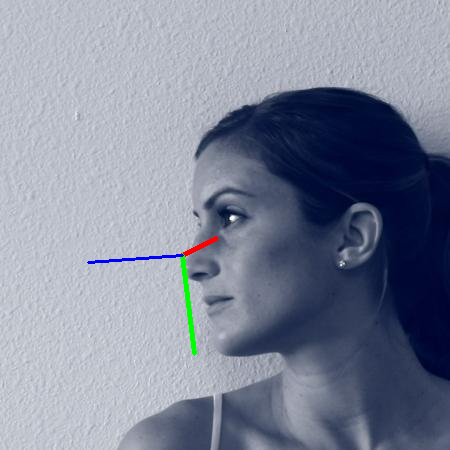

In [67]:
img='image04334'
image= cv2.imread('/content/AFLW2000/'+img+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/AFLW2000/'+img+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))


##X,Y data

In [30]:
X = df_data.drop(['ImgName',	'yaw',	'pitch',	'roll'], axis=1)
Y = df_data[['yaw',	'pitch',	'roll']]

In [32]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
1,235.0,300.0,250.0,279.0,239.0,283.0,242.0,252.0,252.0,272.0,...,248.0,226.0,246.0,229.0,247.0,231.0,275.0,222.0,278.0,219.0
2,251.0,304.0,231.0,288.0,239.0,291.0,206.0,266.0,225.0,280.0,...,221.0,222.0,218.0,227.0,216.0,231.0,256.0,189.0,258.0,184.0
3,236.0,327.0,201.0,306.0,220.0,308.0,180.0,278.0,193.0,298.0,...,205.0,220.0,202.0,227.0,198.0,232.0,242.0,178.0,245.0,169.0
4,203.0,305.0,184.0,277.0,200.0,284.0,185.0,250.0,182.0,269.0,...,225.0,217.0,220.0,221.0,215.0,224.0,262.0,206.0,267.0,200.0
5,226.0,291.0,214.0,277.0,222.0,281.0,212.0,253.0,213.0,271.0,...,244.0,231.0,239.0,233.0,236.0,235.0,280.0,226.0,285.0,223.0


In [33]:
Y.head(5)

,yaw,pitch,roll
1,-0.481678,-0.307462,0.21736
2,0.046326,-0.123922,-0.691047
3,0.435877,-0.10672,-0.715662
4,0.709374,0.063076,-0.220679
5,0.331904,-0.33341,-0.111913


In [34]:
xPoints = [i for i in range(X.shape[1]) if i%2 ==0]
yPoints = [i for i in range(X.shape[1]) if i%2 !=0]

X[xPoints] = X[xPoints].sub(pd.Series(list(X[4]), index=X.index), axis='index')
X[yPoints] = X[yPoints].sub(pd.Series(list(X[5]), index=X.index), axis='index')

d = np.linalg.norm(np.array((X.iloc[:,342],X.iloc[:,343])) - np.array((X.iloc[:,10],X.iloc[:,11])),axis=0)
X = X.div(d,axis='index')

##PCA Model 

In [37]:
from sklearn.decomposition import PCA
import plotly.express as px
pca = PCA()

pca.fit_transform(X)

# d = {'Number of EigenVector': np.arange(1,len(X.columns)+1), 'Varaiability Captured': np.cumsum(pca.explained_variance_ratio_)}
# df = pd.DataFrame(data=d)
# px.line(df, x='Number of EigenVector', y='Varaiability Captured',markers=True,
#                        title='EigenVectors VS Varaiability Captured')

array([[ 3.18827724e+00,  2.71032731e+00, -2.41484778e+00, ...,
        -1.28693904e-03,  4.01029708e-15, -9.37041019e-16],
       [ 5.11435839e+00, -6.75756254e+00,  1.82830394e+00, ...,
         6.60599612e-04, -4.65577611e-15, -3.83842100e-16],
       [ 2.53153529e+00, -6.68886953e+00,  3.70201858e+00, ...,
         1.17125667e-03, -4.26725175e-15,  8.02097644e-16],
       ...,
       [-2.93746755e+00,  2.21546534e+00, -6.88964749e-01, ...,
         2.11009291e-04,  2.78910277e-15,  2.76133431e-17],
       [ 4.51756663e+00,  3.46361658e+00, -1.71882130e-01, ...,
        -4.18054558e-04,  4.13540680e-16, -9.37481903e-17],
       [ 1.54013092e+00, -2.51040222e+00, -1.15022613e+00, ...,
         1.39635027e-03,  1.41280994e-15, -1.19154749e-17]])

In [38]:
pca = PCA(n_components=6)
Xred = pca.fit_transform(X)

##GradientBoostingRegressorModel

##yaw

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model_GradBoos_yaw = GradientBoostingRegressor(random_state=32,max_depth=3, learning_rate=0.2)
model_GradBoos_yaw.fit(Xred, Y['yaw'])
y_yaw_pred = model_GradBoos_yaw.predict(Xred)
print("r2_score train:" ,r2_score(Y['yaw'], y_yaw_pred))

r2_score train: 0.9735831095089513


##pitch

In [41]:
model_GradBoos_pitch = GradientBoostingRegressor(random_state=32,max_depth=3, learning_rate=0.2)
model_GradBoos_pitch.fit(Xred, Y['pitch'])
y_pitch_pred = model_GradBoos_pitch.predict(Xred)
print("r2_score train:" ,r2_score(Y['pitch'], y_pitch_pred))

r2_score train: 0.9683329639357354


##roll

In [42]:
model_GradBoos_roll = GradientBoostingRegressor(random_state=32,max_depth=3, learning_rate=0.2)
model_GradBoos_roll.fit(Xred, Y['roll'])
y_roll_pred = model_GradBoos_roll.predict(Xred)
print("r2_score train:" ,r2_score(Y['roll'], y_roll_pred))

r2_score train: 0.988029856479104


### Create a VideoCapture object and read from input file

In [54]:
cap = cv2.VideoCapture('https://dm0qx8t0i9gc9.cloudfront.net/watermarks/video/GtuAR0I/videoblocks-portrait-of-beautiful-ethnic-brunette-with-long-hair-smiling-at-camera-on-background-of-tropical-park_bqz41pcso4__fe0d8e247505fb2649f9d15e93b0ecd7__P360.mp4')
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video file")

# initializing a list to store the frames   
img_array = []
# Read until video is completed
while(cap.isOpened()):   
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
      with faceModule.FaceMesh(static_image_mode=True) as face:
        # processing the image to detect the face and then generating the land marks (468 for each x,y,z).
        results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None:
          for face in results.multi_face_landmarks:
              # initializing X and Y lists to store the spacial coordinates of the points
              X = []
              Y = []
              # looping over the landmarks to extract x and y
              for landmark in face.landmark:
                  x = landmark.x
                  y = landmark.y
                  # retrieve the true values of x and y
                  shape = frame.shape 
                  relative_x = int(x * shape[1])
                  relative_y = int(y * shape[0])
                  X.append(relative_x)
                  Y.append(relative_y)

              X = np.array(X)
              Y = np.array(Y)
              # centering the data arround the point 99
              X_center = X - X[2]
              Y_center = Y - Y[2]
              d = np.linalg.norm(np.array((X[171],Y[171])) - np.array((X[10],Y[10])))
              X_norm = X_center/d
              Y_norm = Y_center/d
              X_norm = X_norm
              Y_norm = Y_norm
              points = pca.transform(np.hstack([X_norm,Y_norm]).reshape(1,-1))
              # predicting the 3 angels to draw the axis on the image
              p = model_GradBoos_pitch.predict(points)
              y = model_GradBoos_yaw.predict(points)
              r = model_GradBoos_roll.predict(points)
              draw_axis(frame,p, y, r, X[2],Y[2])
              # appending the result frame to the img_array list
              img_array.append(frame)
    # Break the loop
    else: 
        break

cap.release()  
# Closes all the frames
cv2.destroyAllWindows()
print("Number of Detected Frames = ",len(img_array))

Number of Detected Frames =  293


##converting the frames to video

In [55]:
out = cv2.VideoWriter('Alaa_out.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()